<a href="https://colab.research.google.com/github/ammad19/AI-course-exercises/blob/master/pandas_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
!unzip Assignment.rar

Archive:  Assignment.rar
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of Assignment.rar or
        Assignment.rar.zip, and cannot find Assignment.rar.ZIP, period.


In [4]:
!unrar x Assignment.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Assignment.rar

Creating    Assignment                                                OK
Extracting  Assignment/inventory.csv                                       3%  OK 
Extracting  Assignment/README.md                                          30%  OK 
Extracting  Assignment/states0.csv                                        37%  OK 
Extracting  Assignment/states1.csv                                        44%  OK 
Extracting  Assignment/states2.csv                                        51%  OK 
Extracting  Assignment/states3.csv                                        57%  OK 
Extracting  Assignment/states4.csv                                        65%  OK 
Extracting  Assignment/states5.csv                                        71%  OK 
Extracting  Assignment/states6.csv                                        78%  OK

In [5]:
!pwd

/content


In [7]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as pyplot

census_files = glob.glob("Assignment/states*.csv")

file_list = []
for filename in census_files:
    data = pd.read_csv(filename)
    file_list.append(data)

census_files

['Assignment/states8.csv',
 'Assignment/states3.csv',
 'Assignment/states4.csv',
 'Assignment/states5.csv',
 'Assignment/states7.csv',
 'Assignment/states1.csv',
 'Assignment/states9.csv',
 'Assignment/states2.csv',
 'Assignment/states0.csv',
 'Assignment/states6.csv']

In [8]:
us_census = pd.concat(file_list)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,$51805.40540540541,423477M_419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,$55874.522600500095,13171316M_13367298F


In [9]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [10]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [11]:
us_census.Income = us_census.Income.replace('[\$]', '', regex=True)
us_census.Income.head()

0    59125.270833333336
1    46296.807763401106
2     51805.40540540541
3    47328.083616587355
4    55874.522600500095
Name: Income, dtype: object

In [12]:
population_split = us_census.GenderPop.str.split("_")
population_split.head()

0        [510388M, 543273F]
1      [2322409M, 2455167F]
2        [423477M, 419713F]
3      [3167756M, 3331859F]
4    [13171316M, 13367298F]
Name: GenderPop, dtype: object

In [13]:
us_census['male_population'] = population_split.str.get(0)
us_census['female_population'] = population_split.str.get(1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male_population,female_population
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388M_543273F,510388M,543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409M_2455167F,2322409M,2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477M_419713F,423477M,419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756M_3331859F,3167756M,3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316M_13367298F,13171316M,13367298F


In [14]:
pop_split = pd.DataFrame() # Create a temp empty df
pop_split['male_pop'] = us_census.male_population.str[0:-1]
pop_split['female_pop'] = us_census.female_population.str[0:-1]
pop_split.head()

,male_pop,female_pop
0,510388,543273
1,2322409,2455167
2,423477,419713
3,3167756,3331859
4,13171316,13367298


In [15]:
us_census = pd.concat([us_census, pop_split], axis = 1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male_population,female_population,male_pop,female_pop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388M_543273F,510388M,543273F,510388,543273
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409M_2455167F,2322409M,2455167F,2322409,2455167
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477M_419713F,423477M,419713F,423477,419713
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756M_3331859F,3167756M,3331859F,3167756,3331859
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316M_13367298F,13171316M,13367298F,13171316,13367298


In [16]:
# Gather the columns we want into the df
us_census = us_census[['State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'male_pop', 'female_pop',]]
# Rename the male and female population columns
us_census.columns = ['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'male_population', 'female_population']
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388,543273
1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409,2455167
2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477,419713
3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756,3331859
4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316,13367298


In [17]:
us_census.male_population = pd.to_numeric(us_census.male_population)
us_census.female_population = pd.to_numeric(us_census.female_population)
us_census.dtypes

State                 object
TotalPop               int64
Hispanic              object
White                 object
Black                 object
Native                object
Asian                 object
Pacific               object
Income                object
male_population        int64
female_population    float64
dtype: object

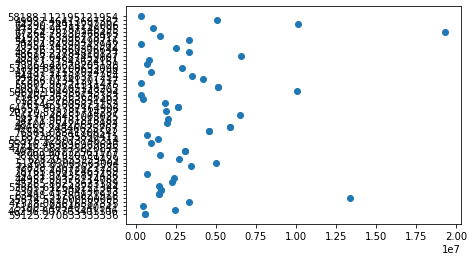

In [18]:
pyplot.scatter(us_census.female_population, us_census.Income) 
pyplot.show()

In [19]:
us_census.female_population.head(15)

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
Name: female_population, dtype: float64

In [21]:
fem_pop_nan = us_census.female_population.isnull()
fem_pop_nan.head(15)
fem_pop_nan.value_counts()

False    57
True      3
Name: female_population, dtype: int64

In [22]:
example_nan = us_census[['TotalPop', 'male_population', 'female_population']]
example_nan.iloc[12]

TotalPop             5930538.0
male_population      2872643.0
female_population          NaN
Name: 0, dtype: float64

In [24]:
nan_value = us_census.TotalPop - us_census.male_population
nan_value

0      543273
1     2455167
2      419713
3     3331859
4    13367298
5     1444150
0     1558931
1     1453125
2     2233145
3     2364097
4      679019
5     3057895
0     3057895
1     3455936
2     5038598
3     2727005
4     1536358
5     3081445
0     3081445
1      504536
2      939759
3     1390901
4      670717
5     4561386
0     5913084
1     1942789
2     1990780
3     6534215
4     1869213
5      543273
0     2630239
1     1841615
2      478041
3      340810
4    10045763
5     5123362
0     1444150
1      318031
2     4195682
3     3497739
4      937789
5     2890732
0     5123362
1      696428
2      806083
3     6556862
4     3333382
5     1558931
0     2489527
1      349215
2     3342840
3     1506295
4    19334329
5     2630239
0     4561386
1     1051703
2    10131373
3     5049925
4      353677
5     5913084
dtype: int64

In [25]:
us_census.female_population = us_census.female_population.fillna(value=nan_value)
example_nan_fixed = us_census[['TotalPop', 'male_population', 'female_population']]
example_nan_fixed.iloc[12]

TotalPop             5930538.0
male_population      2872643.0
female_population    3057895.0
Name: 0, dtype: float64

In [26]:
us_census.female_population.head(15)

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
Name: female_population, dtype: float64

In [27]:
duplicates = us_census.duplicated()
duplicates.value_counts()

False    51
True      9
dtype: int64

In [28]:
us_census = us_census.drop_duplicates()
duplicates_check = us_census.duplicated()
duplicates_check.value_counts()

False    51
dtype: int64

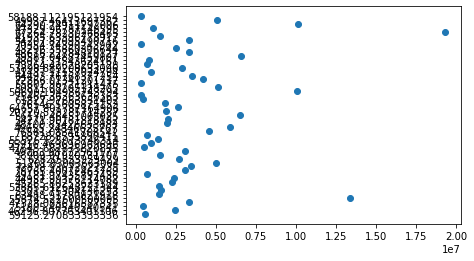

In [29]:
pyplot.scatter(us_census.female_population, us_census.Income) 
pyplot.show()